In [1]:
import numpy as np
import pandas as pd

In [8]:
from sklearn.datasets import load_breast_cancer
>>> data = load_breast_cancer()

In [9]:
data.target[[10, 25, 50]]

array([0, 0, 1])

In [10]:
list(data.target_names)

['malignant', 'benign']

In [12]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


In [13]:
breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

In [14]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.889473684211, total=   0.2s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.926315789474, total=   0.1s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.910052910053, total=   0.4s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.889473684211, total=   1.8s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.926315789474, total=   0.6s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.931216931217, total=   0.5s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=1, score=0.894736842105, total=   4.3s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.1s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=1, score=0.931578947368, total=   4.3s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.4s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=1, score=0.952380952381, total=   7.1s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=2, score=0.889473684211, total=   0.2s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.6s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=2, score=0.926315789474, total=   0.2s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=2, score=0.910052910053, total=   0.1s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=0.889473684211, total=   1.2s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=0.926315789474, total=   1.2s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=0.915343915344, total=   0.6s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_selec

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  4.0min finished


Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=2, score_func=<function f_classif at 0x7f6993f96578>))],
       transformer...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


classif_rate for GPC : 89.982425 
classif_rate for L2 logistic (OvR) : 89.279438 
classif_rate for L1 logistic : 89.103691 
classif_rate for Linear SVC : 88.927944 
classif_rate for L2 logistic (Multinomial) : 89.103691 


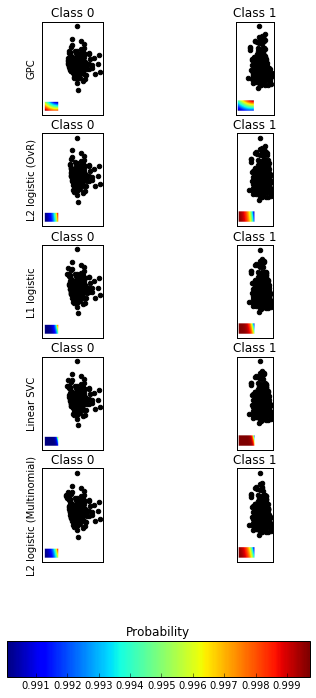

In [41]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data[:, 0:2]  # we only take the first two features for visualization
y = breast_cancer.target

n_features = X.shape[1]

C = 1.0
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0),
               'L2 logistic (Multinomial)': LogisticRegression(
                C=C, solver='lbfgs', multi_class='multinomial'),
               'GPC': GaussianProcessClassifier(kernel)
               }

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

Automatically created module for IPython interactive environment
Average difference of 0.002936 with std. dev. of 0.001839.


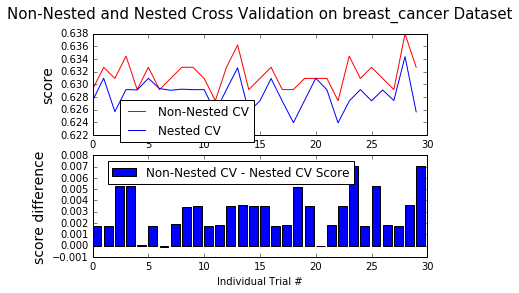

In [27]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
breast_cancer = load_breast_cancer()
X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target
# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_breast_cancer, y_breast_cancer)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_breast_cancer, y=y_breast_cancer, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on breast_cancer Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()



learning on dataset breast cancer
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096922
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.050260
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.050277
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.979983
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504017
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504760
training: adam
Training set score: 0.980000
Training set loss: 0.046248

learning on dataset digits
training: constant learning-rate
Training set score: 0.830000
Training set loss: 0.681498
training: constant with momentum
Training set score: 0.940000
Training set loss: 0.163712
training: constant with Nesterov's momentum
Training set score: 0.940000
Training set loss: 0.163012
training: inv

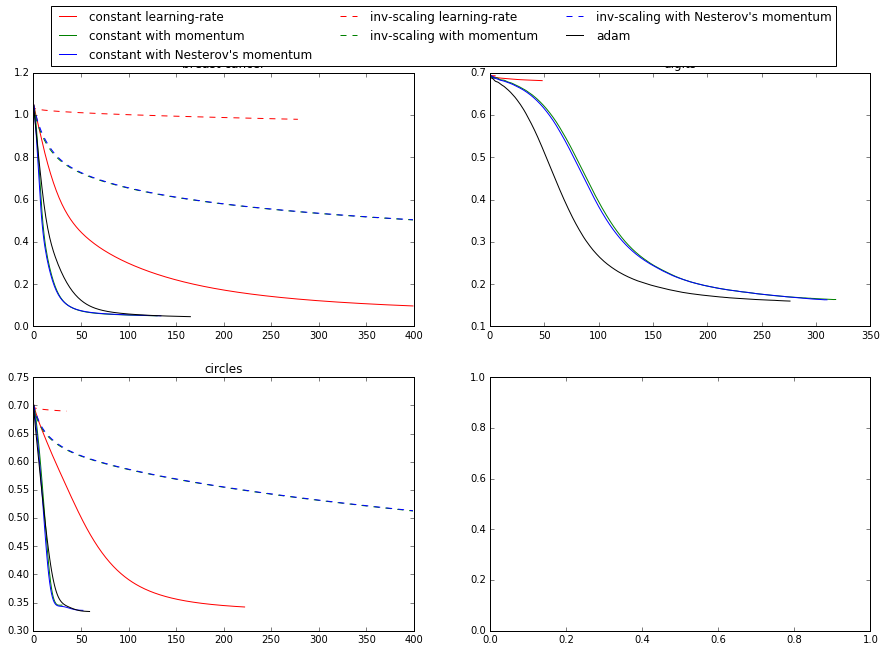

In [35]:
 import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()



Confusion matrix, without normalization
[[50  3]
 [ 7 83]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.08  0.92]]


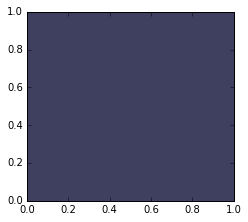

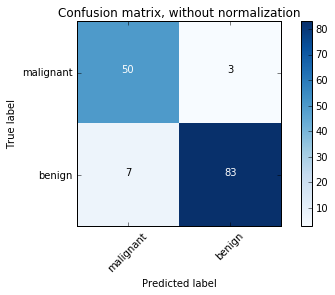

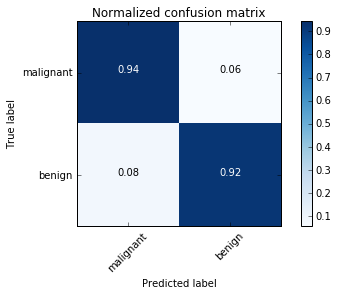

In [40]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
class_names = breast_cancer.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [14]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA

data = ds.load_breast_cancer()['data']
pca_trafo = PCA().fit(data)



In [15]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
data = ds.load_breast_cancer()['data'];

z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data);

plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o');


In [17]:
import sns

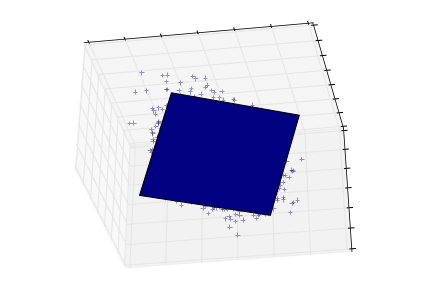

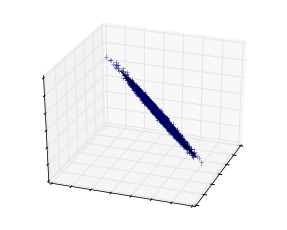

In [18]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

Classification score 0.929707190511 (pvalue : 0.00990099009901)


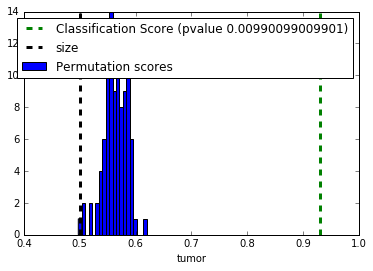

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets


# #############################################################################
# Loading a dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
n_classes = np.unique(y).size

# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[X, E]

svm = SVC(kernel='linear')
cv = StratifiedKFold(2)

score, permutation_scores, pvalue = permutation_test_score(
    svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

# #############################################################################
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
# plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
# plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='size')

plt.ylim(ylim)
plt.legend()
plt.xlabel('tumor')
plt.show()


In [17]:
plt.show()